지하철 혼잡도

1~8호선 혼잡도 2025-11-30

In [2]:
mykey = ''

In [17]:
import requests, json, pandas as pd

headers = {'Authorization': f'Infuser {mykey}'}
url = 'https://api.odcloud.kr/api/15071311/v1/uddi:9c79ebd1-20e1-4e97-8e6a-b65e890fbe85?page=1&perPage=2000'
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data['data'])
    print(df)             
    
    print("\n컬럼 목록:", df.columns.tolist())

    
else:
    print("API 호출 실패")

     00시00분 00시30분 10시00분 10시30분 11시00분 11시30분 12시00분 12시30분 13시00분 13시30분  \
0       5.6    1.4   41.4   46.8   36.5   34.3   32.8   46.4   38.3   31.9   
1       8.4    0.0   23.1   17.9   21.2   24.5   28.6   28.2   32.4   36.2   
2       6.8    1.5   35.4   42.3   34.5   31.2   30.4   42.6   35.9   30.0   
3       5.5    0.3   23.0   19.1   20.8   23.4   28.8   26.1   31.8   35.0   
4       7.7    1.4   31.9   37.5   30.7   27.9   29.2   36.5   34.0   30.2   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1666    0.4    0.0    8.3    8.1    8.6    8.3    9.8    9.7    9.1    9.5   
1667    0.0    0.0    4.5    4.8    4.7    4.9    5.9    6.9    7.0    8.1   
1668    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1669    0.0    0.0   30.2   27.6   26.6   26.3   28.4   28.6   27.2   25.6   
1670    0.0    0.0   11.5   10.7   11.4   11.5   11.0   13.6   14.1   14.8   

      ... 7시30분 8시00분 8시30분 9시00분 9시30분 상하구분   역번호 요일구분  출발역   

In [83]:
# 필요 칼럼만 추출
stringData = [43,42,39,41]
timeData = [i for i in range(31,38,2)] + [i for i in range(2,29,2)]+ [0]

staging_df = df.iloc[:, stringData+timeData]

# 00시00분 -> 0, 2시00분 -> 2
# 1. 시간 칼럼들만 골라내기 (숫자 + '시00분' 패턴)
time_cols = [col for col in df.columns if '시00분' in col]

# 2. 새 이름 만들기: "6시00분" → "6", "00시00분" → "0"
new_names = {}
for col in time_cols:
    hour_str = col.split('시')[0]          # "6", "7", ..., "00"
    hour = int(hour_str)                   # 문자열 → 정수
    new_names[col] = str(hour)             # "6", "0" 등 문자열로

# 3. 칼럼 이름 일괄 변경
staging_df = staging_df.rename(columns=new_names)

print(staging_df)

       호선  출발역 상하구분 요일구분     6     7     8     9    10    11  ...    15    16  \
0     1호선  서울역   상선   평일  20.8  37.4  72.3  62.5  41.4  36.5  ...  27.8  25.9   
1     1호선  서울역   하선   평일  11.2  22.9  41.4  29.6  23.1  21.2  ...  47.3  53.8   
2     1호선   시청   상선   평일  15.4  29.4  58.7  48.5  35.4  34.5  ...  29.5  28.5   
3     1호선   시청   하선   평일  10.4  21.7  35.3  29.8  23.0  20.8  ...  44.5  48.9   
4     1호선   종각   상선   평일  13.5  19.3  35.4  31.5  31.9  30.7  ...  32.1  32.7   
...   ...  ...  ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   
1666  8호선   수진   하선  일요일   3.8   3.8   6.2   9.6   8.3   8.6  ...   7.9   7.6   
1667  8호선   모란   상선  일요일   1.1   1.4   2.5   4.8   4.5   4.7  ...   8.6   9.4   
1668  8호선   모란   하선  일요일   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   
1669  8호선  남위례   상선  일요일   9.0  11.1  18.7  26.6  30.2  26.6  ...  23.9  21.8   
1670  8호선  남위례   하선  일요일   4.0   4.2   5.1   8.8  11.5  11.4  ...  17.8  23.1   

        17     18    19    

In [93]:
# 출발역 + 호선으로 라벨 만들기 (예: "1호선 서울역")
curated_df = staging_df.iloc[:, 2:]
curated_df['역_호선'] = staging_df['호선'] + ' ' + staging_df['출발역']

elseNum = list(range(0,21))
subwayNum = [21]
curated_df = curated_df.iloc[:, subwayNum+elseNum]
print(curated_df)

         역_호선 상하구분 요일구분     6     7     8     9    10    11    12  ...    15  \
0     1호선 서울역   상선   평일  20.8  37.4  72.3  62.5  41.4  36.5  32.8  ...  27.8   
1     1호선 서울역   하선   평일  11.2  22.9  41.4  29.6  23.1  21.2  28.6  ...  47.3   
2      1호선 시청   상선   평일  15.4  29.4  58.7  48.5  35.4  34.5  30.4  ...  29.5   
3      1호선 시청   하선   평일  10.4  21.7  35.3  29.8  23.0  20.8  28.8  ...  44.5   
4      1호선 종각   상선   평일  13.5  19.3  35.4  31.5  31.9  30.7  29.2  ...  32.1   
...       ...  ...  ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1666   8호선 수진   하선  일요일   3.8   3.8   6.2   9.6   8.3   8.6   9.8  ...   7.9   
1667   8호선 모란   상선  일요일   1.1   1.4   2.5   4.8   4.5   4.7   5.9  ...   8.6   
1668   8호선 모란   하선  일요일   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1669  8호선 남위례   상선  일요일   9.0  11.1  18.7  26.6  30.2  26.6  28.4  ...  23.9   
1670  8호선 남위례   하선  일요일   4.0   4.2   5.1   8.8  11.5  11.4  11.0  ...  17.8   

        16    17     18    19    20    

In [96]:
# 1. 상선 (상선만 필터링)
df_upper = curated_df[staging_df['상하구분'] == '상선'].copy()   
# 2. 하선 (하선만 필터링)
df_lower = curated_df[staging_df['상하구분'] == '하선'].copy()

print(df_upper)
print(df_lower)

           역_호선 상하구분 요일구분     6     7     8     9    10    11    12  ...  \
0       1호선 서울역   상선   평일  20.8  37.4  72.3  62.5  41.4  36.5  32.8  ...   
2        1호선 시청   상선   평일  15.4  29.4  58.7  48.5  35.4  34.5  30.4  ...   
4        1호선 종각   상선   평일  13.5  19.3  35.4  31.5  31.9  30.7  29.2  ...   
6      1호선 종로3가   상선   평일  14.5  19.3  38.8  30.8  32.5  30.6  30.6  ...   
8      1호선 종로5가   상선   평일  10.9  14.5  29.6  26.2  26.8  28.3  30.7  ...   
...         ...  ...  ...   ...   ...   ...   ...   ...   ...   ...  ...   
1661  8호선 단대오거리   상선  일요일   4.6   6.2  10.3  14.7  15.7  14.2  15.3  ...   
1663     8호선 신흥   상선  일요일   2.9   3.4   5.6   8.5   9.2   8.2   9.7  ...   
1665     8호선 수진   상선  일요일   1.7   2.3   3.5   6.5   6.2   6.1   8.2  ...   
1667     8호선 모란   상선  일요일   1.1   1.4   2.5   4.8   4.5   4.7   5.9  ...   
1669    8호선 남위례   상선  일요일   9.0  11.1  18.7  26.6  30.2  26.6  28.4  ...   

        15    16    17    18    19    20    21    22    23     0  
0     27.8  25.9  28

/var/folders/2v/cr2_y57x1kbfbs1sfsbb5vwc0000gn/T/ipykernel_2133/292198754.py:27: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/2v/cr2_y57x1kbfbs1sfsbb5vwc0000gn/T/ipykernel_2133/292198754.py:27: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/2v/cr2_y57x1kbfbs1sfsbb5vwc0000gn/T/ipykernel_2133/292198754.py:27: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/2v/cr2_y57x1kbfbs1sfsbb5vwc0000gn/T/ipykernel_2133/292198754.py:27: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/2v/cr2_y57x1kbfbs1sfsbb5vwc0000gn/T/ipykernel_2133/292198754.py:27: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/2v/cr2_y57x1kbfbs1sfsbb5vwc0000gn/T/ipykernel_2133/292198754.py:27: UserWarning: Gly

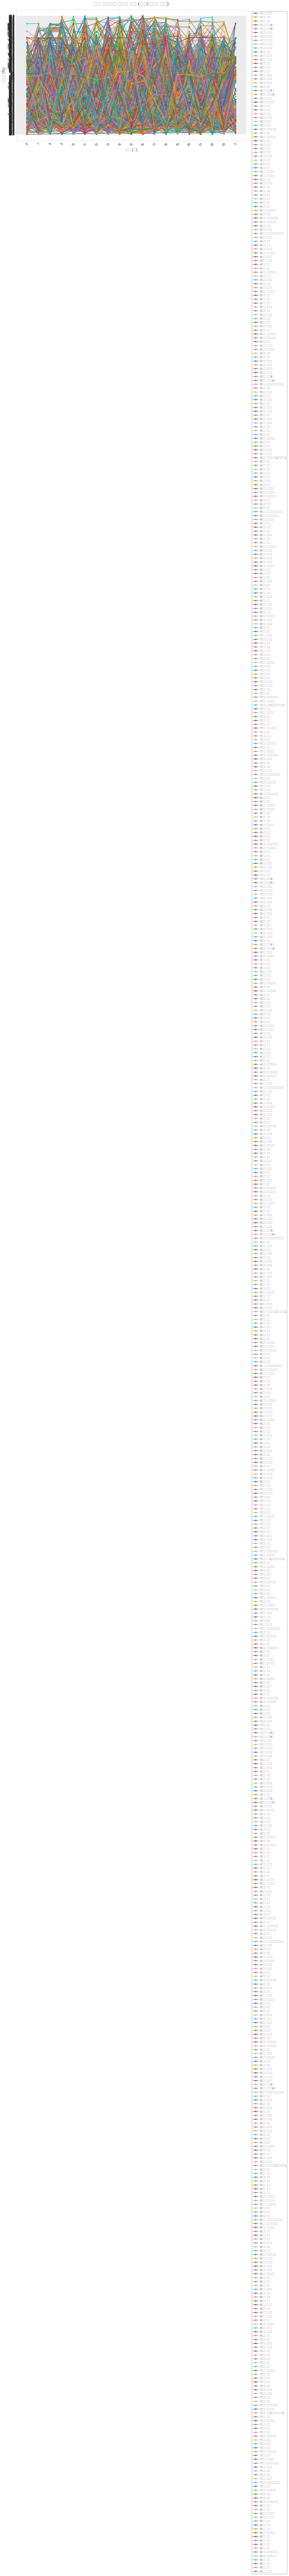

In [99]:
# 그래프
import matplotlib.pyplot as plt
import seaborn as sns

# 시간 칼럼들 (숫자 문자열)
time_cols = [str(i) for i in range(6, 24)] + ['0']  # 6~23 + 0 (00시)

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# 모든 역을 한 번에 플롯 (legend로 구분)
for idx, row in df_upper.iterrows():
    label = row['역_호선']
    plt.plot(time_cols, row[time_cols], marker='o', linewidth=1.8, markersize=4, 
             alpha=0.9, label=label)

plt.title('상선 시간대별 혼잡도 비교 (평일/일요일 혼합)', fontsize=16, pad=15)
plt.xlabel('시간 (시)', fontsize=13)
plt.ylabel('혼잡도 (%)', fontsize=13)
plt.xticks(time_cols, rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

# legend가 너무 많으면 오른쪽 밖으로 빼기
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9, 
           ncol=1, frameon=True, edgecolor='gray')

plt.tight_layout()
plt.show()

참조(외부) 자료

In [ ]:
1. 대중교통 혼잡도 (정성적 자료)
1.1 지하철
<출근길 붐비는 서울지하철 4호선…한 칸은 의자 없이>, 연합뉴스, https://www.youtube.com/watch?v=Bo9QPNEmZ6E
1.2 버스
"계속 늘어나는 광역버스로 혼잡해지는 서울 도심, 해결 방안은?", https://mediahub.seoul.go.kr/archives/2011154

